In [11]:
import pandas as pd

df = pd.read_csv('fct_invoice.csv')

Easy Question 1: How many unique customers are in the dataset?
Answer: There are 5191 Unique Customers

In [13]:
unique_customers = df['customer_id'].nunique()
unique_customers

5191

Easy Question 2: What are the different categories of products available? How many unique categories are there?
Answer: The categories are 'Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir' and there are 8 unique ones.

In [19]:
df_unique_categories = df['category'].unique()
df_unique_categories

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [18]:
len(df_unique_categories)

8

Easy Question 3: Which payment method is the most popular? How many times was it used?
Answer: Cash is the most popular. It was used 44447 times

In [22]:
df_payment_methods = df['payment_method'].value_counts()
df_payment_methods

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

Medium Question 1. What are the three most popular categories, by total sales?
Answer: The three most popular categories by total sales are Clothing, Shoes and Technology

In [32]:
df['total'] = df['price'] * df['quantity']
df_sales_by_categories = df[['category','total']].groupby('category').sum()
largest_three = df_sales_by_categories.nlargest(3, 'total')
largest_three

,total
category,
Clothing,1.139968e+08
Shoes,6.655345e+07
Technology,5.786235e+07


Medium Question 2. What are the total sales attributed to customers over the age of 45?
Answer: 82039768.15

In [117]:
df_customer_data = pd.read_json('dim_customer.json')
merged_df = pd.merge(df, df_customer_data, left_on='customer_id', right_on='id')
sales_over_45 = merged_df[merged_df['age'] > 45]['total'].sum()
sales_over_45

82039768.15

Medium Question 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)
Answer: There are higher sales during December and January but fall offf quicklya after that. There are also some high points during July and October

<Axes: xlabel='month'>

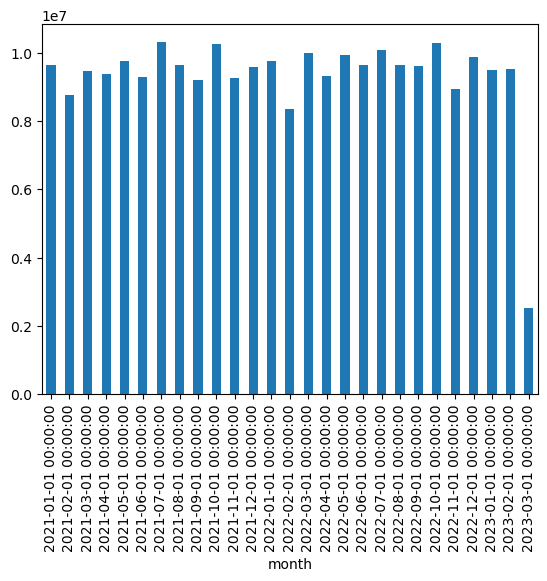

In [124]:
merged_df['month'] = pd.to_datetime(merged_df['invoice_date'], format='%d/%m/%Y').dt.to_period("M")
monthly_sales = merged_df.groupby('month')['total'].sum()

monthly_sales.index = monthly_sales.index.to_timestamp()
monthly_sales.plot.bar()

Hard Question 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [178]:
# df_1019 = merged_df[(merged_df['age'] >= 10) & (merged_df['age'] <= 19)][['total','category']].groupby('category').sum().rename(columns={'total': '10-19'})
# df_2029 = merged_df[(merged_df['age'] >= 20) & (merged_df['age'] <= 29)][['total','category']].groupby('category').sum().rename(columns={'total': '20-29'})

# asdf = pd.merge(df_1019,df_2029,on='category')
# asdf
merged_df['age_group'] = pd.cut(
    merged_df['age'],
    bins=range(10, 100, 10),
    labels=[f"{i}-{i+9}" for i in range(10, 90, 10)],
    right=True
)
pivot = merged_df.pivot_table(
    index='age_group',
    columns='category',
    values='total',
    aggfunc='sum',
    observed=False
)
pivot

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
age_group,,,,,,,,
10-19,19891.95,3029007.52,178009.48,20433.61,1367187.26,20128.68,1772400.0,98273.28
20-29,80128.35,10079987.28,594733.82,74271.23,6152942.84,53570.91,5049450.0,380011.52
30-39,84446.10,11516170.16,722406.22,89187.19,7178633.37,63705.63,6231750.0,426460.16
40-49,82946.25,10933114.72,656740.32,85034.57,6775319.13,65007.66,5840100.0,378864.64
50-59,79537.50,10819684.48,621366.12,77686.42,6268175.48,57594.30,4662000.0,357002.24
60-69,76234.80,10004067.04,599735.00,76127.88,5499357.71,51482.97,5218500.0,340659.20
70-79,56251.95,7871098.40,427824.52,55584.44,4718536.54,38439.21,3773700.0,285608.96
80-89,21103.95,3739897.04,214684.80,25334.12,2125201.97,20234.25,1449000.0,126336.00
